# DNN

### 상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)




In [1]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)


W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{predicted} \nAccuracy:\n{accuracy}")


Hypothesis:
[[0.01118422]
 [0.99493575]
 [0.99493575]
 [0.02438853]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [2]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.1
for step in range(10001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6929008960723877
step:1000,	 cost:0.6907983422279358
step:1500,	 cost:0.6856606602668762
step:2000,	 cost:0.6681321859359741
step:2500,	 cost:0.6143725514411926
step:3000,	 cost:0.5017193555831909
step:3500,	 cost:0.3041874170303345
step:4000,	 cost:0.1625085175037384
step:4500,	 cost:0.10023443400859833
step:5000,	 cost:0.07013194262981415
step:5500,	 cost:0.05320872366428375
step:6000,	 cost:0.04257518798112869
step:6500,	 cost:0.035346753895282745
step:7000,	 cost:0.030143652111291885
step:7500,	 cost:0.026233481243252754
step:8000,	 cost:0.023195073008537292
step:8500,	 cost:0.020770307630300522
step:9000,	 cost:0.018792886286973953
step:9500,	 cost:0.017151042819023132
step:10000,	 cost:0.015767065808176994
Hypothesis:[[0.01526495]
 [0.9791965 ]
 [0.98642075]
 [0.01290688]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 6.049176  6.122585]
 [-5.760253 -6.277827]], b1:[ 2.8576012 -3.321048 ], w2:[[-9.3568  ]
 [ 9.868225]], 

### Optimizer 적용

In [4]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.001
opt = tf.keras.optimizers.Adam(lr)
for step in range(5001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6866353750228882
step:1000,	 cost:0.6217808723449707
step:1500,	 cost:0.47173699736595154
step:2000,	 cost:0.35258468985557556
step:2500,	 cost:0.2675658166408539
step:3000,	 cost:0.20677727460861206
step:3500,	 cost:0.1624651551246643
step:4000,	 cost:0.12943826615810394
step:4500,	 cost:0.1043068990111351
step:5000,	 cost:0.08483567833900452
Hypothesis:[[0.08504632]
 [0.9485386 ]
 [0.88753384]
 [0.07533152]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 4.985145   5.5098476]
 [-4.8044515 -5.8524776]], b1:[ 3.0071926 -2.8788571], w2:[[-6.880319 ]
 [ 5.4160395]], b2[3.8919582]


## Keras로 XOR 문제 해결하기


In [5]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.sigmoid, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation=tf.sigmoid)
])
model.summary()
opt = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 12ms/sample - loss: 0.0965 - binary_accuracy: 1.0000


[0.0964551568031311, 1.0]

### Keras 문자열 설정 실습 – XOR 문제

In [6]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 13ms/sample - loss: 0.0965 - accuracy: 1.0000


[0.0964551568031311, 1.0]

## 회귀 문제 실습 – 보스턴 주택 가격

In [7]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std 

X_test -=mean 
X_test /=std

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'
               , input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

history = model.fit(X_train, y_train ,epochs =50, batch_size=50, validation_split=0.2)
model.evaluate(X_test, y_test)

(404, 13) (102, 13)
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 0s 1ms/sample - loss: 550.7786 - mae: 21.5394 - val_loss: 588.6596 - val_mae: 22.3338
Epoch 2/50
323/323 [==============================] - 0s 108us/sample - loss: 501.9073 - mae: 20.2631 - val_loss: 543.3442 - val_mae: 21.2373
Epoch 3/50
323/323 [==============================] - 0s 108us/sample - loss: 459.5328 - mae: 19.1437 - val_loss: 497.2541 - val_mae: 20.1179
Epoch 4/50
323/323 [==============================] - 0s 102us/sample - loss: 416.0787 - mae: 17.9597 - val_loss: 446.8388 - val_mae: 18.8110
Epoch 5/50
323/323 [==============================] - 0s 105us/sample - loss: 369.5291 - mae: 16.6988 - val_loss: 393.9573 - val_mae: 17.4113
Epoch 6/50
323/323 [==============================] - 0s 108us/sample - loss: 321.7672 - mae: 15.3778 - val_loss: 341.6710 - val_mae: 16.0019
Epoch 7/50
323/323 [==============================] - 0s 108us/sample - loss: 274.310

[23.74754243738511, 3.201297]

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


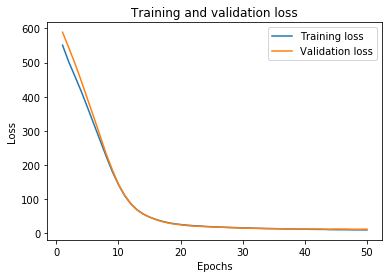

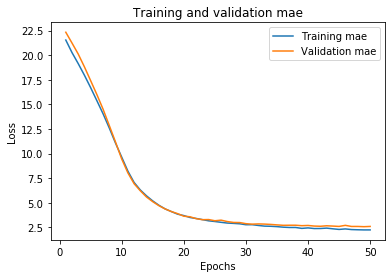

In [9]:
import matplotlib.pyplot as plt

print(history.history.keys())
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 이진분류 실습 -  IMDB

In [10]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words = 10000)
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [11]:
print(train_data[:2])
print(y_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
import numpy as np

# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                   epochs=20, batch_size=512,
                   validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 64us/sample - loss: 0.5028 - accuracy: 0.8102 - val_loss: 0.3728 - val_accuracy: 0.8790
Epoch 2/20
20000/20000 [==============================] - 1s 43us/sample - loss: 0.2841 - accuracy: 0.9047 - val_loss: 0.2830 - val_accuracy: 0.8944
Epoch 3/20
20000/20000 [=======

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 시각화로 과적합 확인

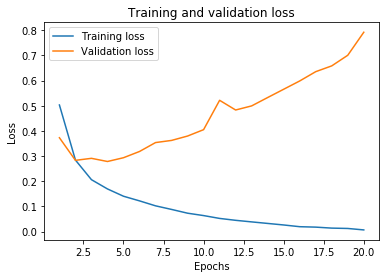

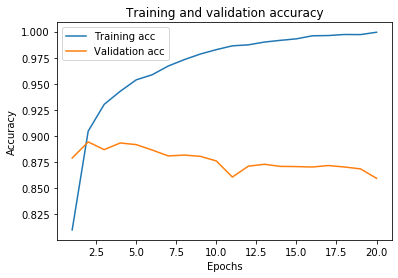

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Callback

In [17]:
import datetime
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

cb = MyCustomCallback()
x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mse')    
model.fit(x,y, callbacks=[cb])
model.evaluate(x,y, callbacks=[cb])

Train on 10 samples
Training: batch 0 begins at 14:07:19.546784
Training: batch 0 ends at 14:07:19.751238
10/10 [==============================] - 0s 21ms/sample - loss: 108.7213
Evaluating: batch 0 begins at 14:07:19.773213
Evaluating: batch 0 ends at 14:07:19.809082
10/10 [==============================] - 0s 4ms/sample - loss: 108.4152


108.4151611328125

#### EarlyStopping Callback 적용

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=20, batch_size=512, callbacks=[cb],  validation_split=0.2)
results = model.evaluate(X_test, y_test)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 74us/sample - loss: 0.4639 - accuracy: 0.7894 - val_loss: 0.3019 - val_accuracy: 0.8904
Epoch 2/20
20000/20000 [==============================] - 1s 46us/sample - loss: 0.2520 - accuracy: 0.9061 - val_loss: 0.2718 - val_accuracy: 0.8940
Epoch 3/20
20000/20000 [==============================] - 1s 47us/sample - loss: 0.1879 - accuracy: 0.9326 - val_loss: 0.2976 - val_accuracy: 0.8894
Epoch 4/20
25000/25000 [==============================] - 2s 97us/sample - loss: 0.3310 - accuracy: 0.8765


### 다항 분류 실습 -  MNIST 손글씨
#### Data loading

<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


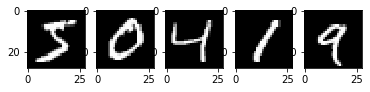

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


#### Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

#### Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4158 - accuracy: 0.8781 - val_loss: 0.1512 - val_accuracy: 0.9549
Epoch 2/10
48000/48000 [=======================

#### 직접 쓴 숫자 prediction

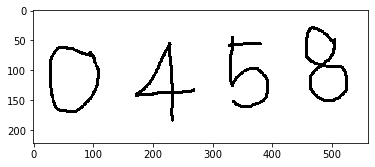

[[9.8817492e-01 1.6209874e-06 9.9072075e-03 7.1681308e-04 1.4652636e-05
  1.4940080e-05 2.0343365e-05 1.1697479e-04 9.0064214e-07 1.0316544e-03]] [0]
[[5.0466191e-05 4.4826546e-04 3.5165090e-03 1.0515474e-05 9.9301320e-01
  1.9799753e-04 1.4564622e-03 1.0353056e-03 7.0611495e-06 2.6413737e-04]] [4]
[[3.1926036e-03 3.0947285e-04 6.4370607e-04 5.7561947e-03 5.7202438e-04
  8.2061297e-01 1.2099824e-02 3.6135697e-04 1.0018111e-01 5.6270730e-02]] [5]
[[4.2500912e-04 8.9232618e-04 2.6839292e-03 2.2629904e-02 1.5245330e-04
  3.2002840e-03 6.1846361e-04 1.0983438e-04 9.6407276e-01 5.2150162e-03]] [8]


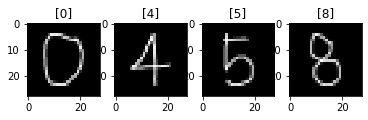

In [25]:
import numpy as np
import cv2
import img2data

img_path = './img/0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="gray")